<font size="16">Pattern Recognition Final Project</font>

<font size="6">Georgios Psaltakis TH20027</font>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import preprocessing, model_selection, neighbors, discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)


 <font size="6">STEP 1 – Data Selection</font>

In [2]:
file = ("breast-cancer-wisconsin.data")
df = pd.read_csv(file,delim_whitespace=False, header=None)
columns = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
df.columns = columns 
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<font size="6">Step 2 – Data inspection</font>

 Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  


In [3]:
mask = df.isin(["?"])
num_question_marks = mask.sum().sum()
print(f"Number of rows containing '?': {num_question_marks}")
df = df.replace("?", np.nan)
df = df.dropna()

Number of rows containing '?': 16


In [4]:
mask = df.isin(["?"])
num_question_marks = mask.sum().sum()
print(f"Number of rows containing '?': {num_question_marks}")

Number of rows containing '?': 0


In [5]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
col = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses","Class"]
df_new = df.loc[:,col] 

In [7]:
df_new

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [8]:
df_new = df_new.drop(['Mitoses'], axis=1)

In [9]:
df_new

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,5,1,1,1,2,1,3,1,2
1,5,4,4,5,7,10,3,2,2
2,3,1,1,1,2,2,3,1,2
3,6,8,8,1,3,4,3,7,2
4,4,1,1,3,2,1,3,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,3,8,10,4
697,4,8,6,4,3,4,10,6,4


In [10]:
target = df_new.Class

In [11]:
df_class= df_new.drop(['Class'], axis=1)

In [12]:
target_class = df_new.Class


<font size="6">STEP 3 – Data Prepossessing</font>

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       683.000000               683.000000                683.000000   
mean          4.442167                 3.150805                  3.215227   
std           2.820761                 3.065145                  2.988581   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
count         683.000000                   683.000000       683.000000   
mean            2.830161                     3.234261         3.445095   
std             2.864562                     2.223085         2.449697   
min       

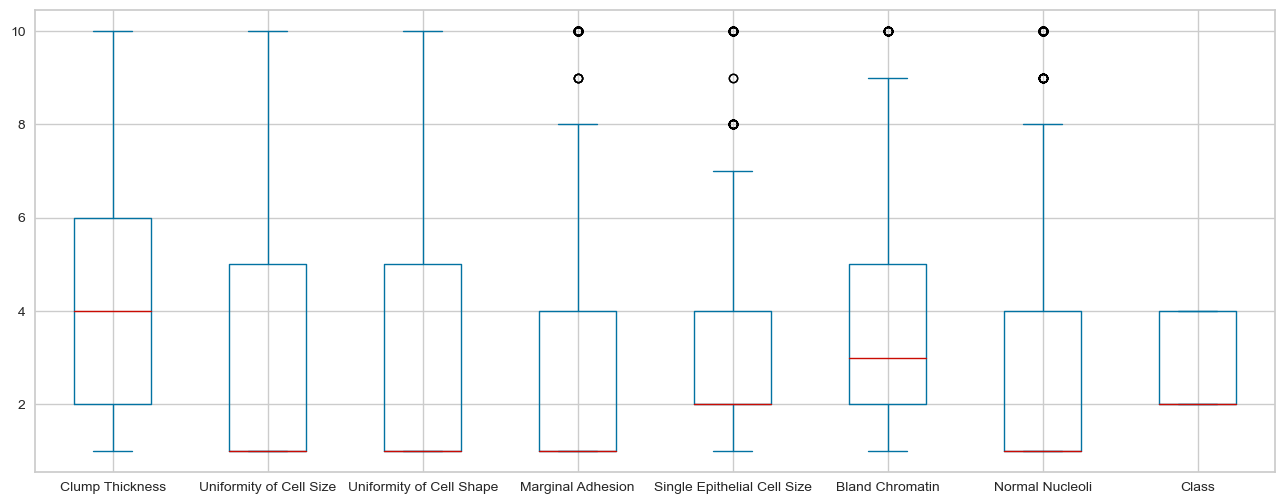

In [13]:
df_new.plot.box(figsize=(16, 6))
print(df_new.describe())


In [14]:
df_class_2 = df_new.loc[df_new['Class'] == 2]
df_class_4 = df_new.loc[df_new['Class'] == 4]


       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       683.000000               683.000000                683.000000   
mean          4.442167                 3.150805                  3.215227   
std           2.820761                 3.065145                  2.988581   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
count         683.000000                   683.000000       683.000000   
mean            2.830161                     3.234261         3.445095   
std             2.864562                     2.223085         2.449697   
min       

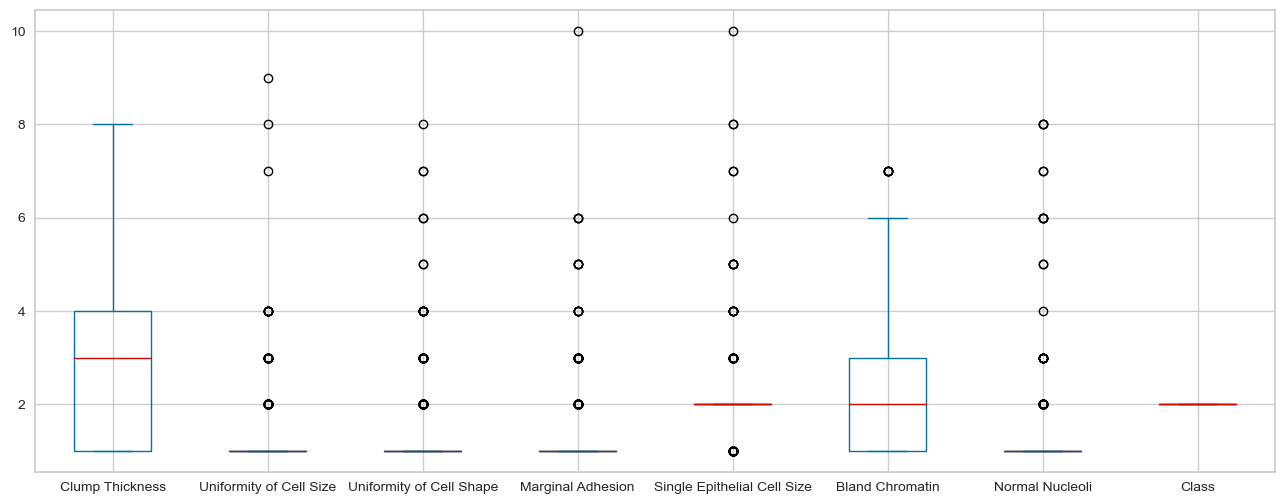

In [15]:
df_class_2.plot.box(figsize=(16, 6))
print(df_new.describe())


       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       683.000000               683.000000                683.000000   
mean          4.442167                 3.150805                  3.215227   
std           2.820761                 3.065145                  2.988581   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
count         683.000000                   683.000000       683.000000   
mean            2.830161                     3.234261         3.445095   
std             2.864562                     2.223085         2.449697   
min       

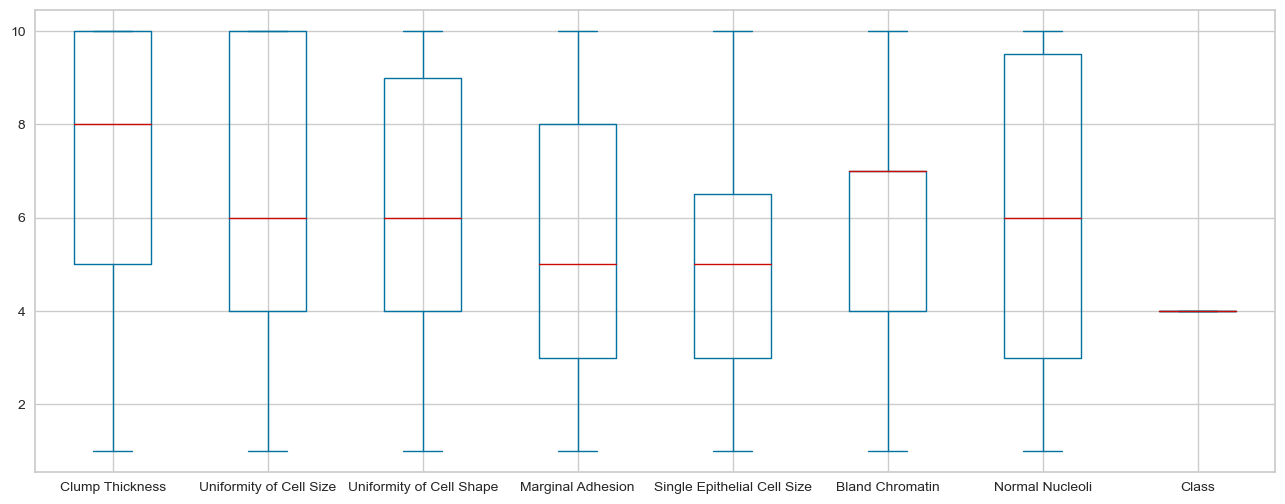

In [16]:
df_class_4.plot.box(figsize=(16, 6))
print(df_new.describe())


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df_new = pd.DataFrame(df_new)
target = pd.DataFrame(target)

In [18]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = min_max_scaler.fit_transform(df_new)
normalized_df = pd.DataFrame(normalized_df, columns=df_new.columns)

In [19]:
normalized_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.0
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.0
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,1.0
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,1.0


In [20]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
lof.fit(normalized_df)
outlier_scores = lof.negative_outlier_factor_
threshold = -2
outliers = np.where(outlier_scores < threshold)
normalized_df = normalized_df[outlier_scores >= threshold]


In [21]:
normalized_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0
5,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,1.0
12,0.444444,0.222222,0.222222,0.222222,0.111111,0.222222,0.333333,0.333333,1.0
...,...,...,...,...,...,...,...,...,...
675,0.444444,1.000000,1.000000,0.444444,0.333333,0.444444,0.333333,0.333333,1.0
677,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.0
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,1.0
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,1.0


In [22]:
normalized_df = normalized_df.reset_index(drop=True)


In [23]:
column_names =["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli","Class"]
normalized_df = pd.DataFrame(normalized_df, columns=column_names)
column_names =["Class"]
normalized_target = pd.DataFrame(normalized_df, columns=column_names)

In [24]:
normalized_df = normalized_df.drop(['Class'], axis=1)

In [25]:
normalized_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111
2,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000
3,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667
4,0.444444,0.222222,0.222222,0.222222,0.111111,0.222222,0.333333,0.333333
...,...,...,...,...,...,...,...,...
503,0.444444,1.000000,1.000000,0.444444,0.333333,0.444444,0.333333,0.333333
504,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000
505,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000
506,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556


In [26]:
normalized_target

,Class
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
503,1.0
504,0.0
505,1.0
506,1.0


       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       508.000000               508.000000                508.000000   
mean          0.462380                 0.310805                  0.318460   
std           0.314841                 0.365032                  0.352917   
min           0.000000                 0.000000                  0.000000   
25%           0.222222                 0.000000                  0.000000   
50%           0.444444                 0.111111                  0.222222   
75%           0.666667                 0.555556                  0.555556   
max           1.000000                 1.000000                  1.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count         508.000000                   508.000000   508.000000   
mean            0.262248                     0.293307     0.370079   
std             0.345109                     0.262839     0.432348   
min             0.000000  

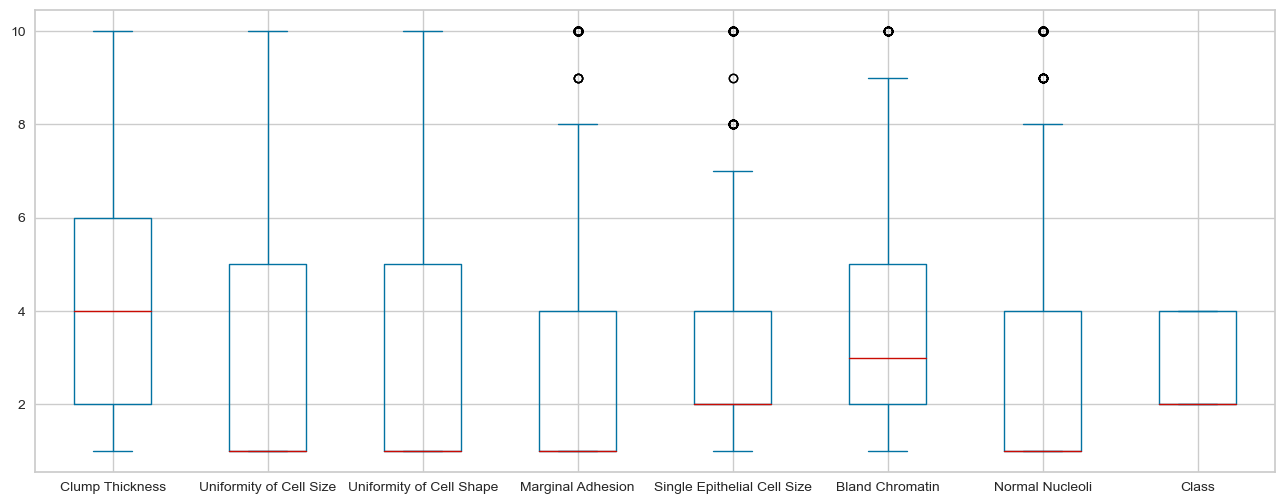

In [27]:
df_new.plot.box(figsize=(16, 6))
print(normalized_df.describe())

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

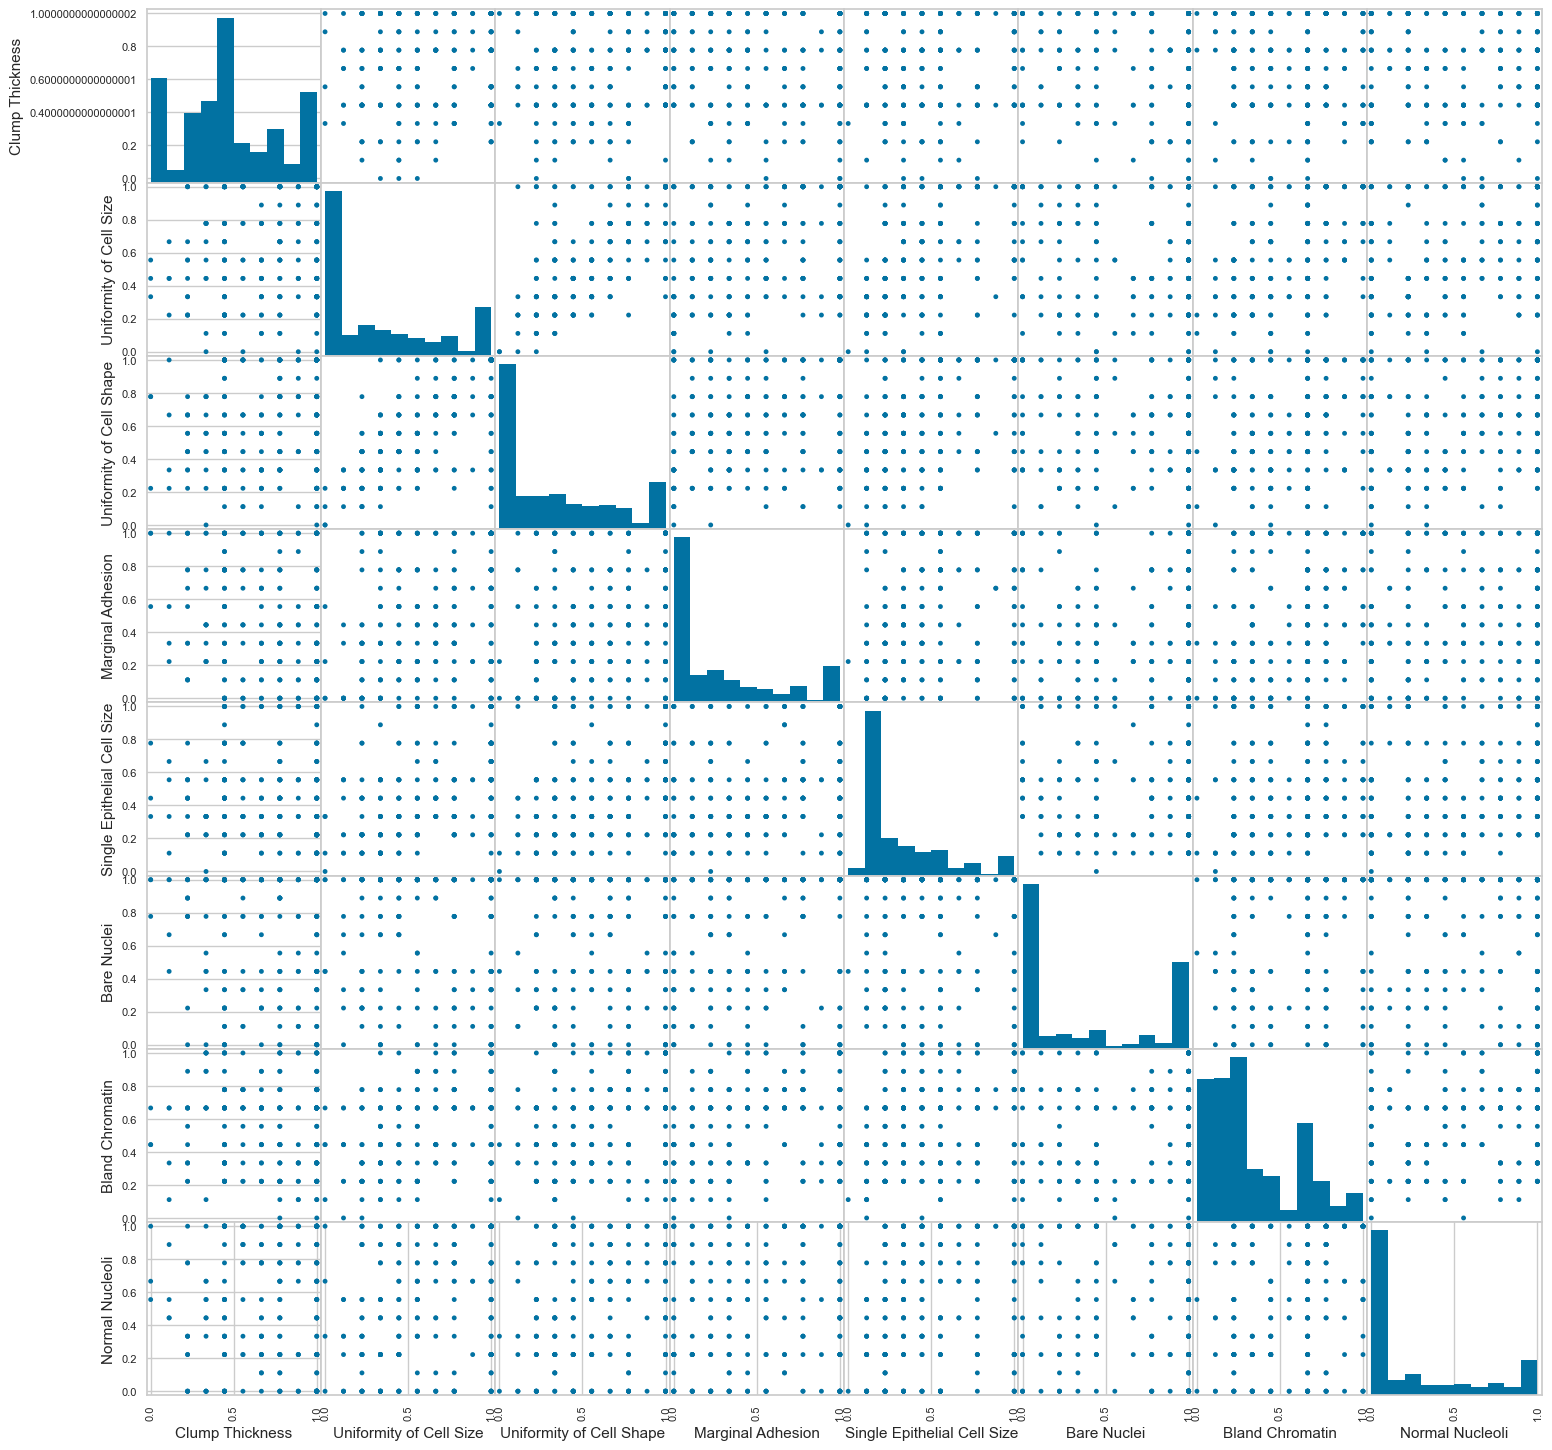

In [28]:
pd.plotting.scatter_matrix(normalized_df,normalized_target, figsize=(18, 18))



 <font size="6">Step 4 – Supervised learning (Classification)</font>

90% -10%

In [29]:
x_train9, x_test9, y_train9, y_test9 = model_selection.train_test_split(normalized_df, normalized_target, test_size=0.1,random_state=0)

 80% -20%

In [30]:
x_train8, x_test8, y_train8, y_test8 = model_selection.train_test_split(normalized_df, normalized_target, test_size=0.2,random_state=0)

70% -30%

In [31]:
x_train7, x_test7, y_train7, y_test7 = model_selection.train_test_split(normalized_df, normalized_target, test_size=0.3,random_state=0)

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

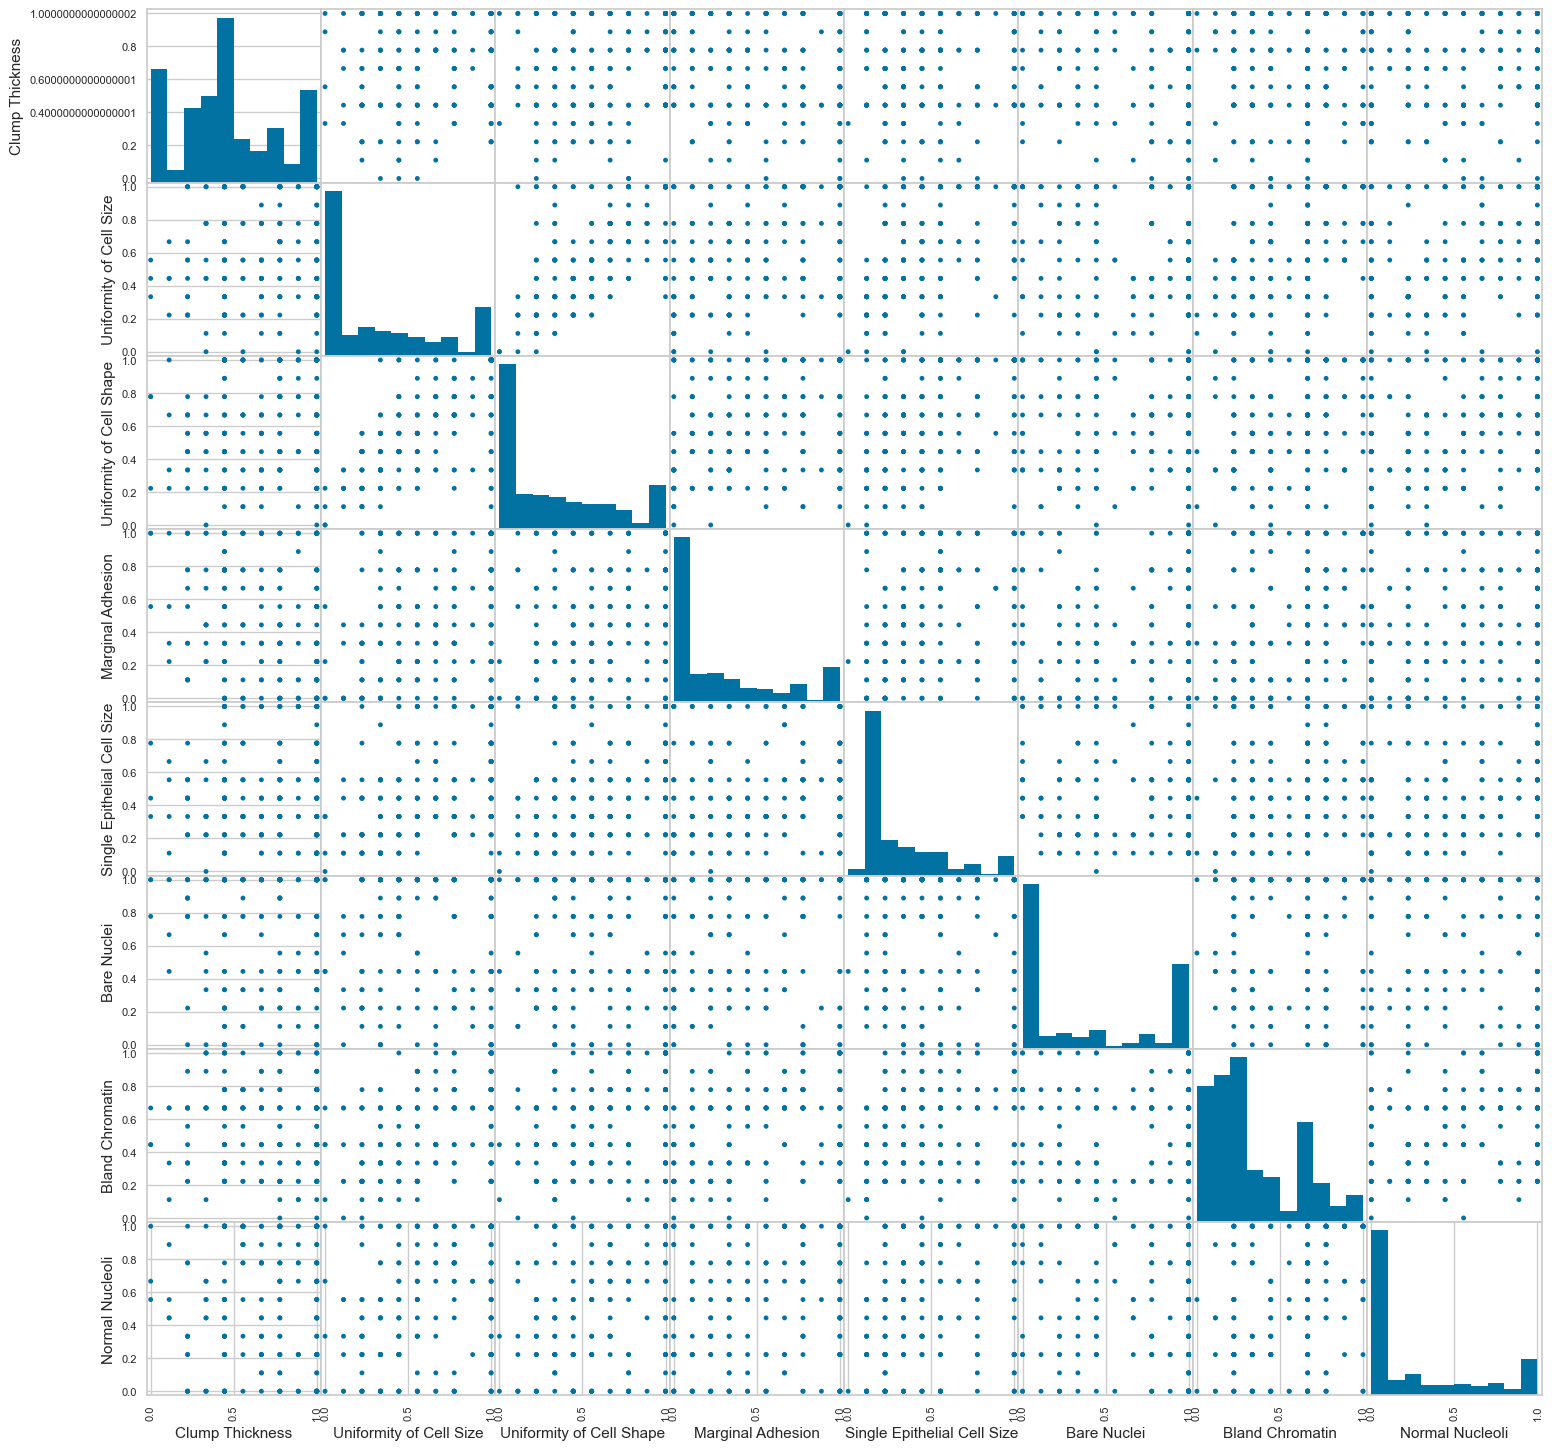

In [32]:
pd.plotting.scatter_matrix(x_train9,y_train9, figsize=(18, 18))

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

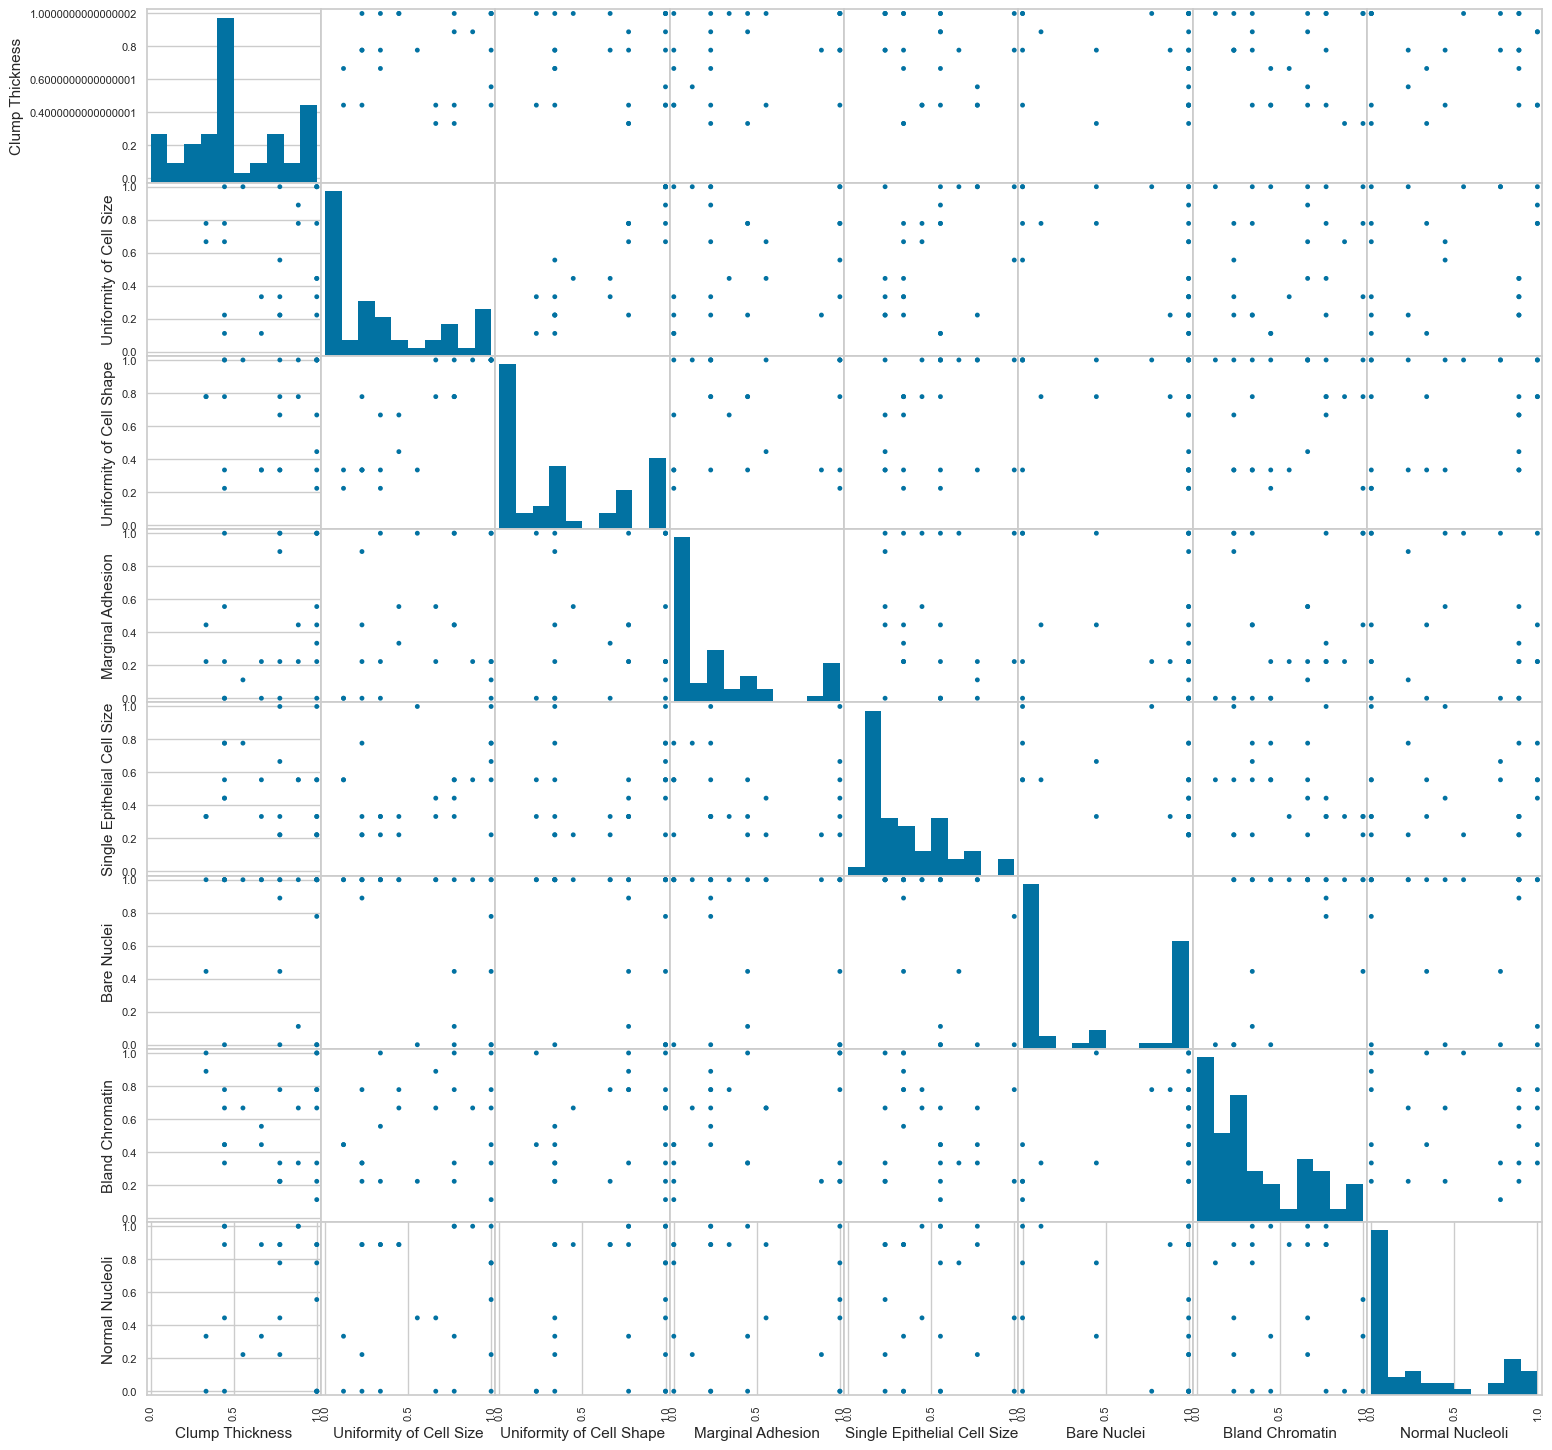

In [33]:
pd.plotting.scatter_matrix(x_test9,y_test9, figsize=(18, 18))

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

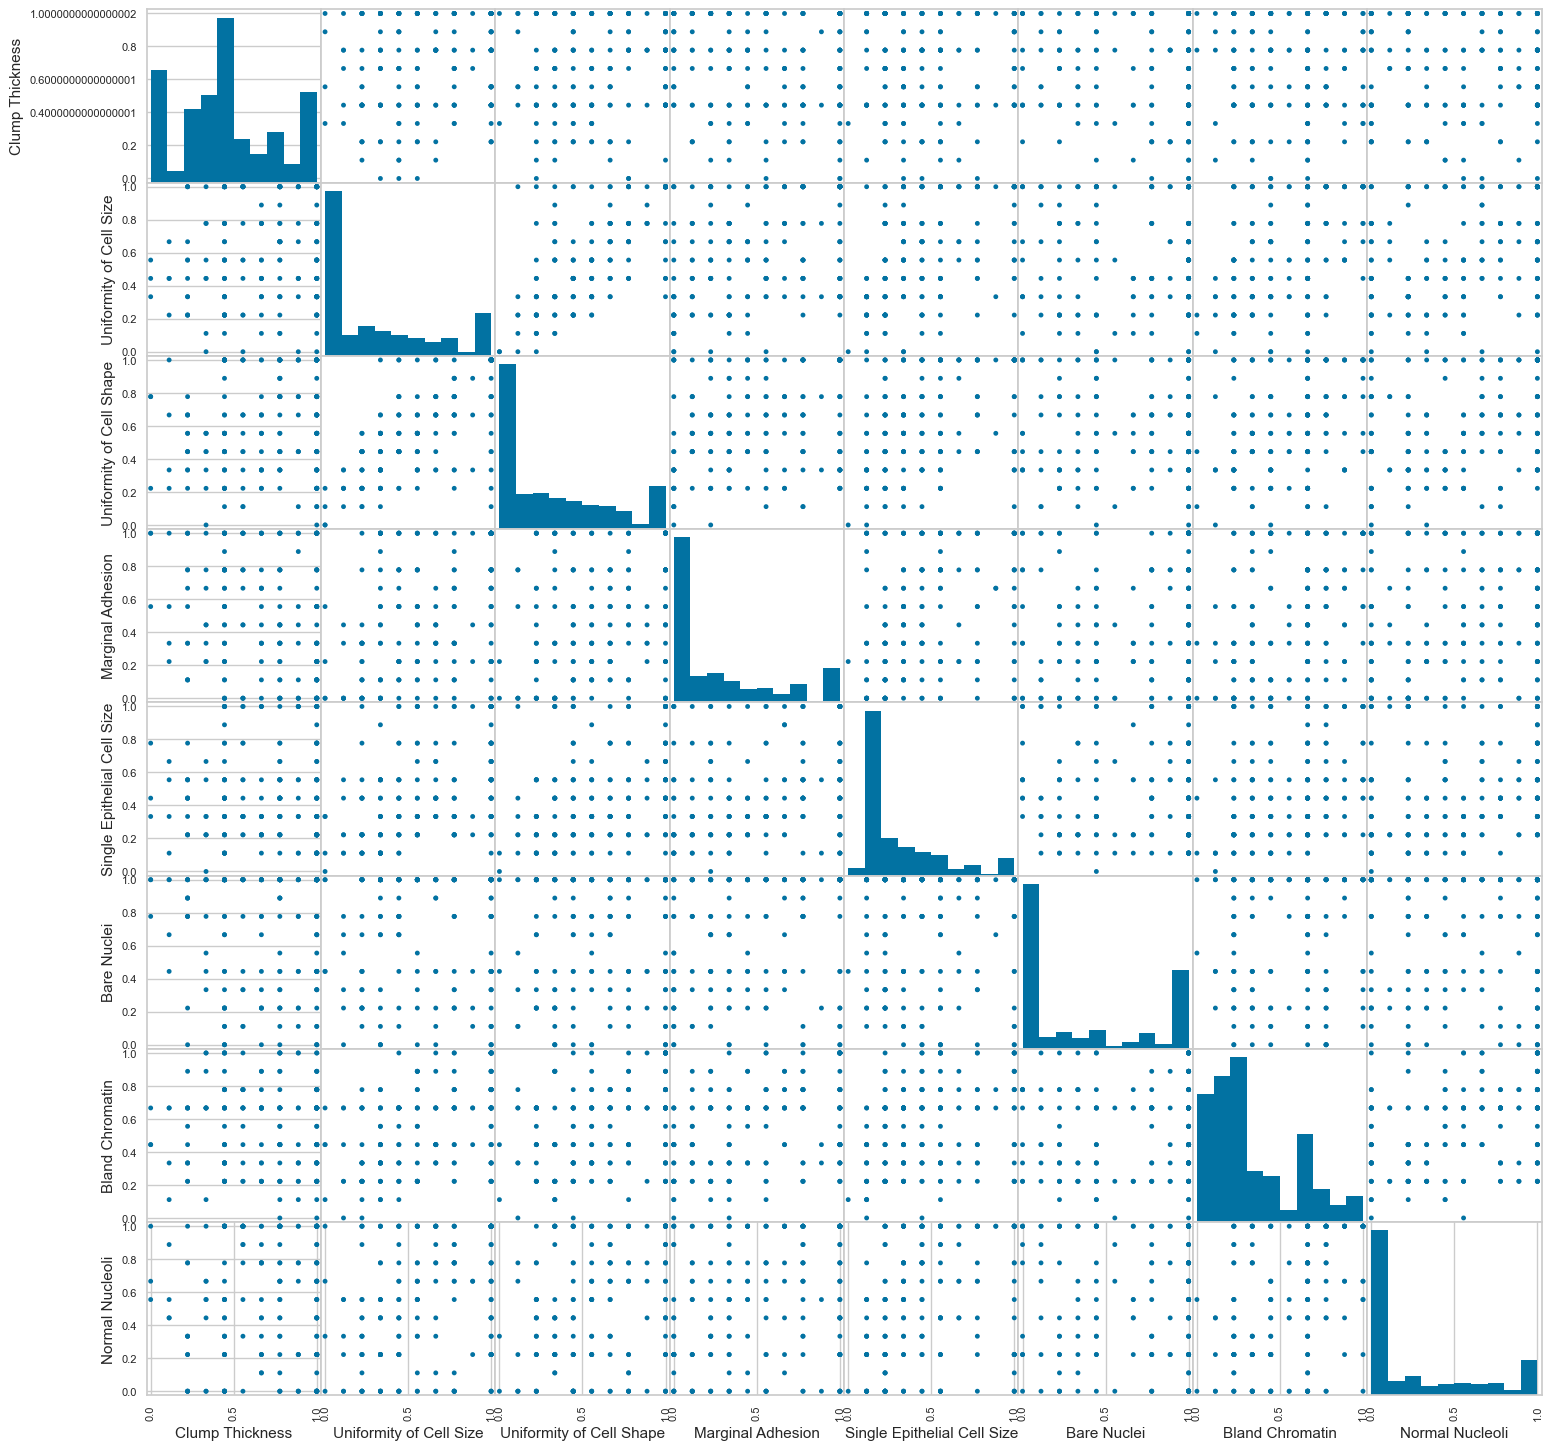

In [34]:
pd.plotting.scatter_matrix(x_train8,y_train8, figsize=(18, 18))

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

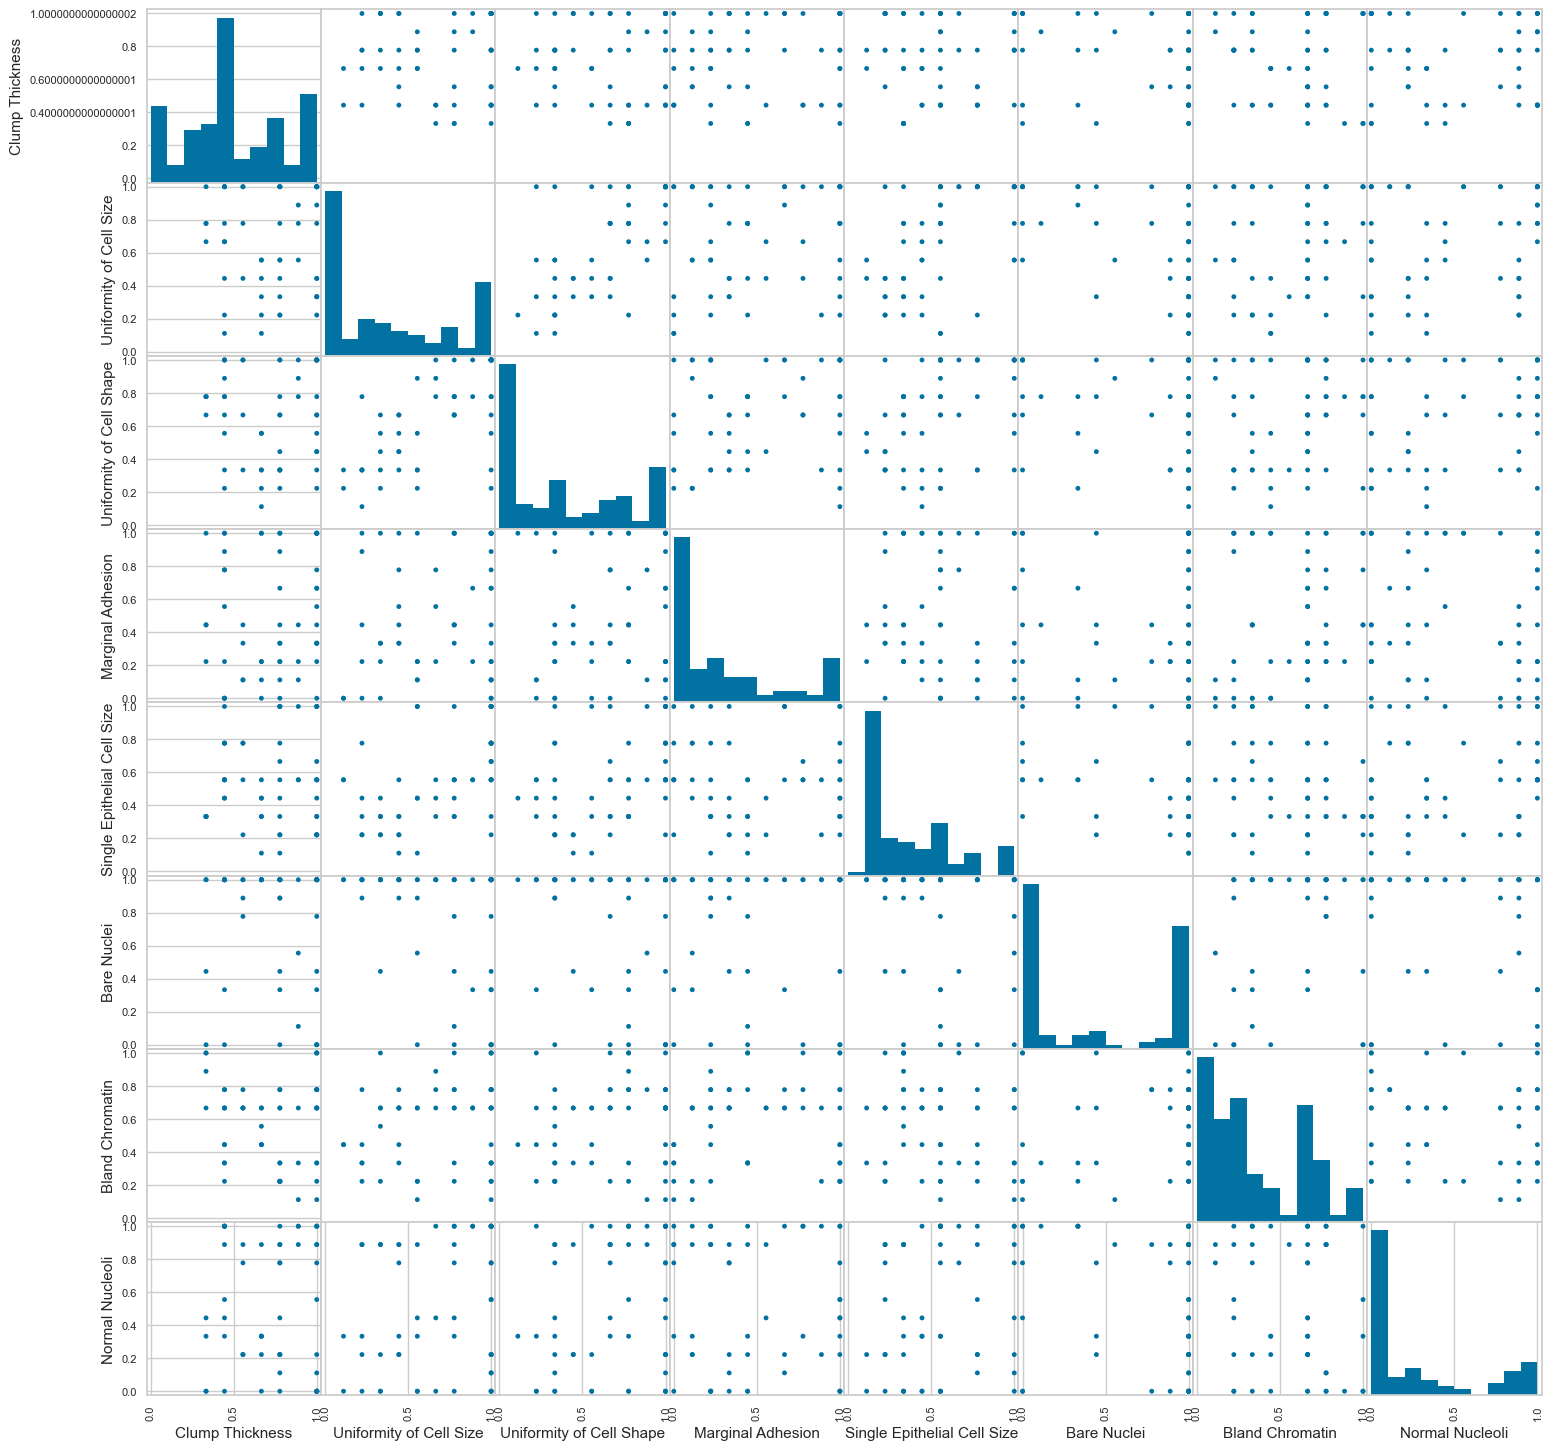

In [35]:
pd.plotting.scatter_matrix(x_test8,y_test8, figsize=(18, 18))

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

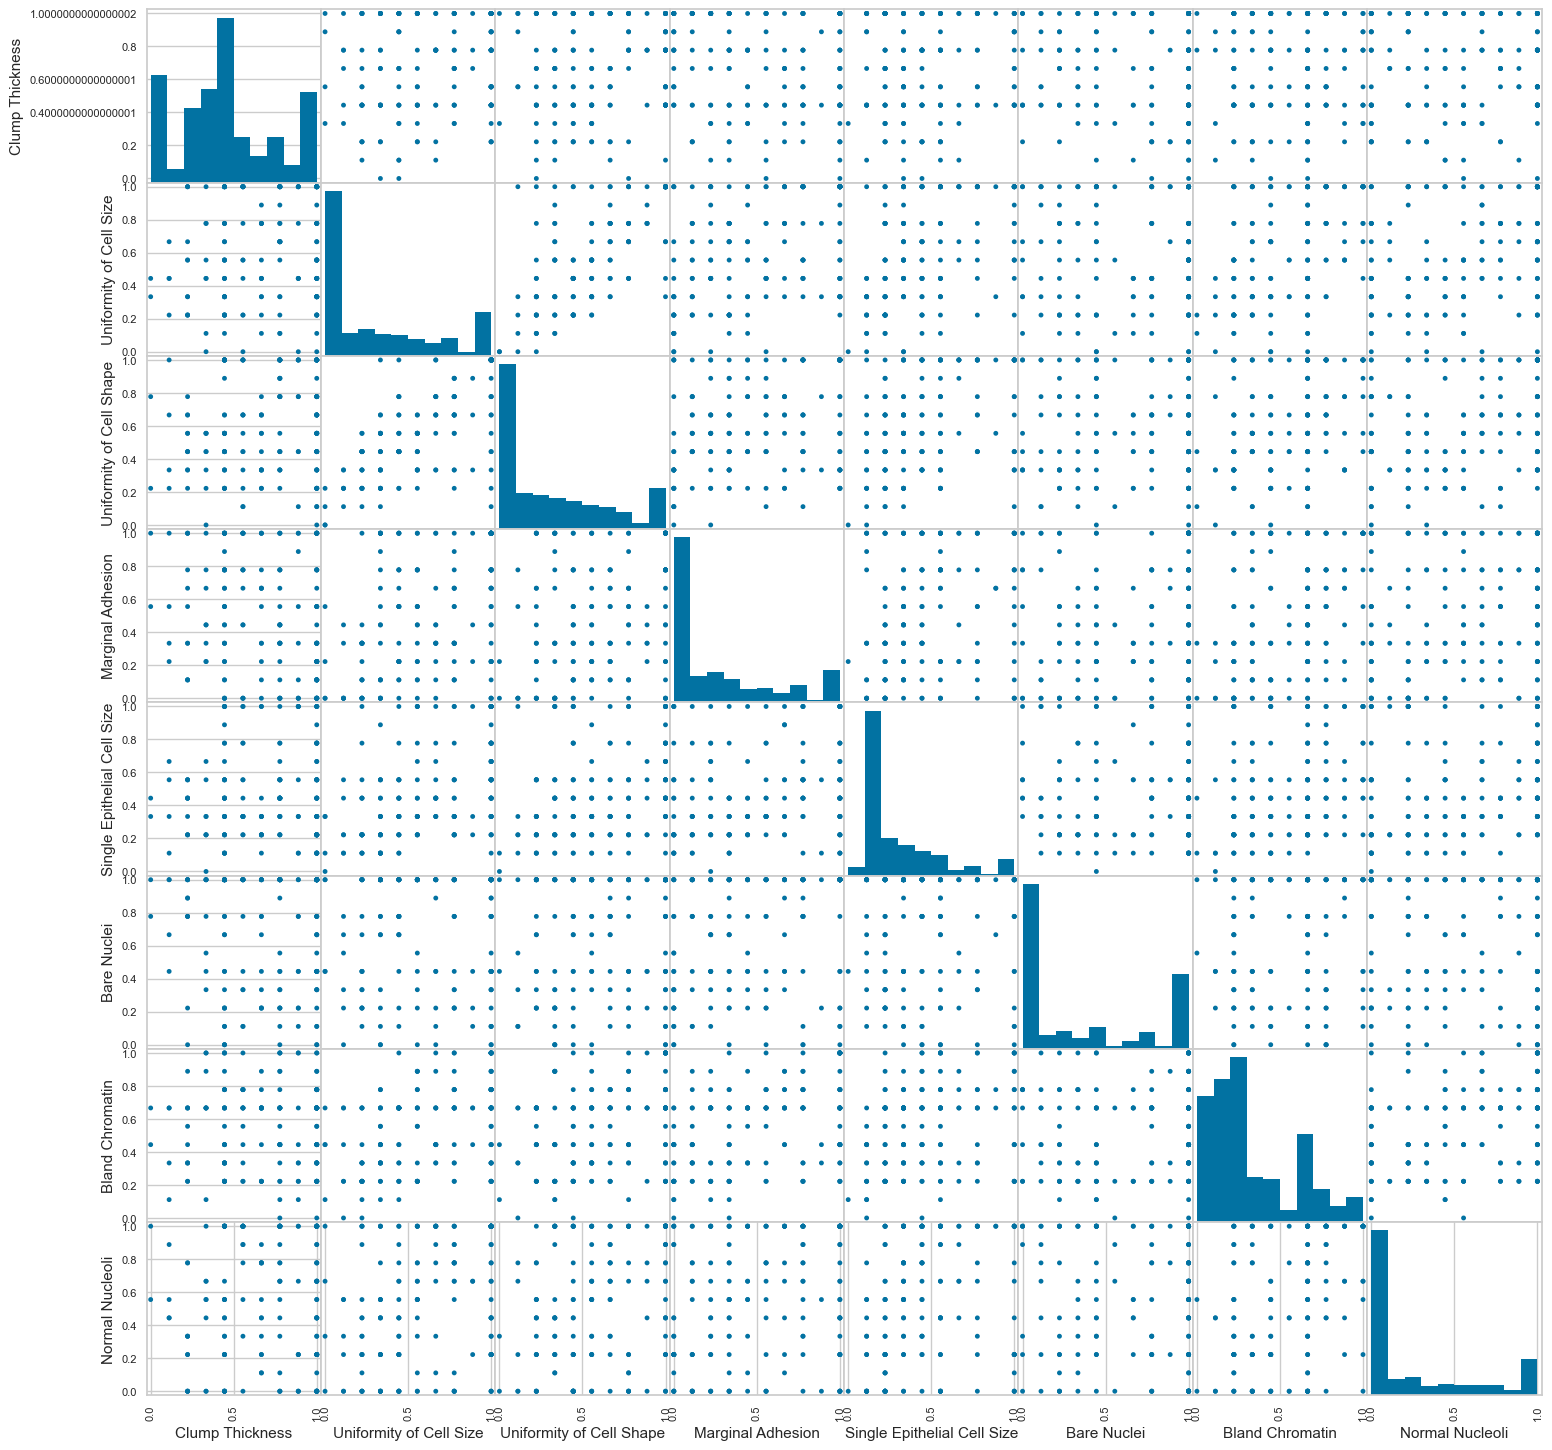

In [36]:
pd.plotting.scatter_matrix(x_train7,y_train7, figsize=(18, 18))

array([[<AxesSubplot:xlabel='Clump Thickness', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bare Nuclei', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Bland Chromatin', ylabel='Clump Thickness'>,
        <AxesSubplot:xlabel='Normal Nucleoli', ylabel='Clump Thickness'>],
       [<AxesSubplot:xlabel='Clump Thickness', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Marginal Adhesion', ylabel='Uniformity of Cell Size'>,
        <AxesSubplot:xlabel='Sing

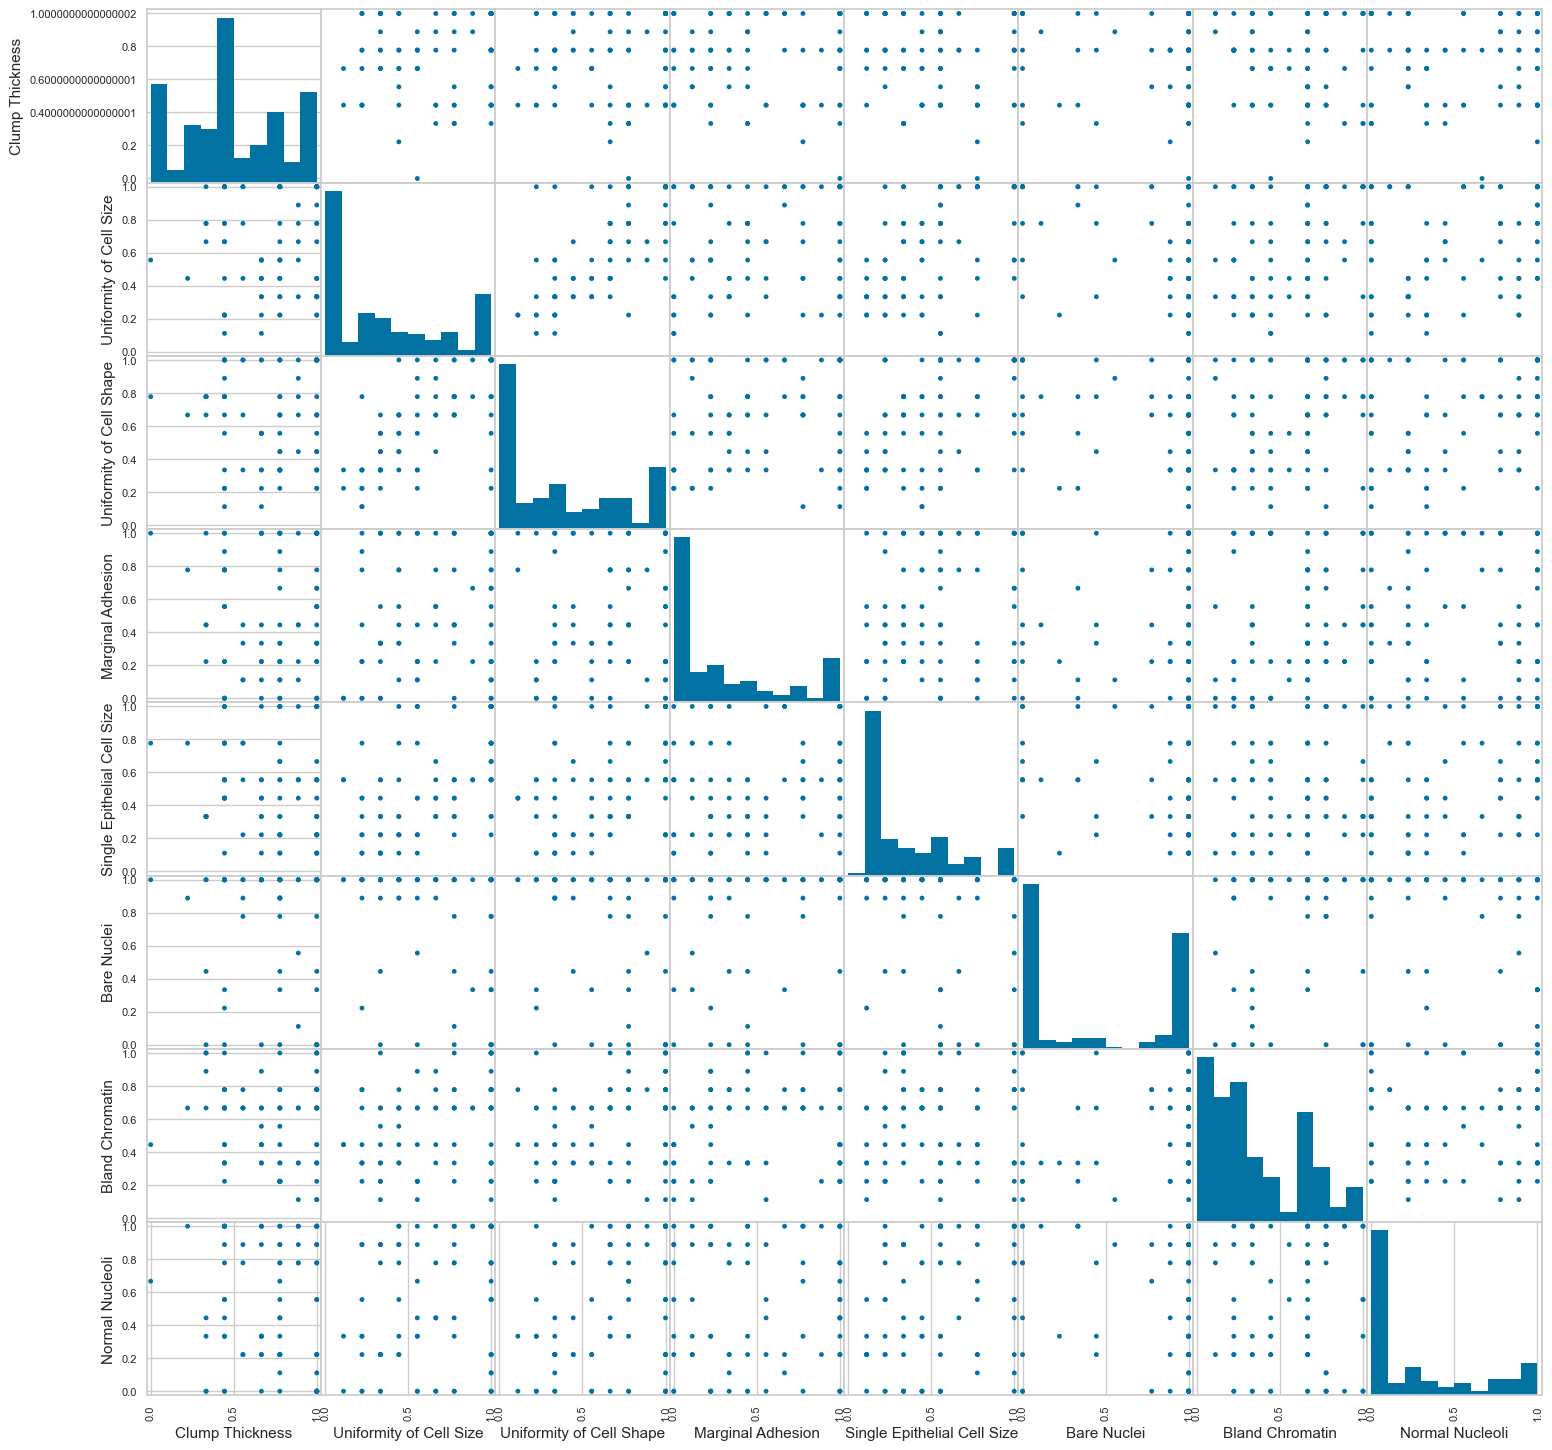

In [37]:
pd.plotting.scatter_matrix(x_test7,y_test7, figsize=(18, 18))

Supervised learning (Classification)

In [38]:
from numpy import ravel

y_train9 = ravel(y_train9)
y_test9 = ravel(y_test9)
y_train8 = ravel(y_train8)
y_test8 = ravel(y_test8)
y_train7 = ravel(y_train7)
y_test7 = ravel(y_test7)
import pandas as pd
from sklearn.metrics import classification_report

90% -10%

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


linear_classifier = LinearDiscriminantAnalysis()

linear_classifier.fit(x_train9, y_train9)
y_pred9 = linear_classifier.predict(x_test9)

print("LinearDiscriminantAnalysis")
classification_error = 1 - accuracy_score(y_test9, y_pred9)
print("Classification error: ", classification_error)
report = classification_report(y_test9, y_pred9)
print('report:', report, sep='\n')

quadratic_classifier = QuadraticDiscriminantAnalysis()

quadratic_classifier.fit(x_train9, y_train9)
y_pred9 = quadratic_classifier.predict(x_test9)

print("QuadraticDiscriminantAnalysis")

classification_error = 1 - accuracy_score(y_test9, y_pred9)
print("Classification error: ", classification_error)
report = classification_report(y_test9, y_pred9)
print('report:', report, sep='\n')

LinearDiscriminantAnalysis
Classification error:  0.039215686274509776
report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        26
         1.0       0.93      1.00      0.96        25

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51

QuadraticDiscriminantAnalysis
Classification error:  0.05882352941176472
report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        26
         1.0       0.89      1.00      0.94        25

    accuracy                           0.94        51
   macro avg       0.95      0.94      0.94        51
weighted avg       0.95      0.94      0.94        51



80% -20%

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

linear_classifier = LinearDiscriminantAnalysis()

linear_classifier.fit(x_train8, y_train8)
y_pred8 = linear_classifier.predict(x_test8)

classification_error = 1 - accuracy_score(y_test8, y_pred8)
print("LinearDiscriminantAnalysis")
print("Classification error: ", classification_error)
report = classification_report(y_test8, y_pred8)
print('report:', report, sep='\n')
quadratic_classifier = QuadraticDiscriminantAnalysis()

quadratic_classifier.fit(x_train8, y_train8)
y_pred8 = quadratic_classifier.predict(x_test8)

classification_error = 1 - accuracy_score(y_test8, y_pred8)
print("QuadraticDiscriminantAnalysis")
print("Classification error: ", classification_error)
report = classification_report(y_test8, y_pred8)
print('report:', report, sep='\n')

LinearDiscriminantAnalysis
Classification error:  0.019607843137254943
report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        49
         1.0       0.96      1.00      0.98        53

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102

QuadraticDiscriminantAnalysis
Classification error:  0.02941176470588236
report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        49
         1.0       0.95      1.00      0.97        53

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



70% -30%

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


linear_classifier = LinearDiscriminantAnalysis()
linear_classifier.fit(x_train7, y_train7)
y_pred7 = linear_classifier.predict(x_test7)

print("LinearDiscriminantAnalysis")
classification_error = 1 - accuracy_score(y_test7, y_pred7)
print("Classification error: ", classification_error)
report = classification_report(y_test7, y_pred7)
print('report:', report, sep='\n')

quadratic_classifier = QuadraticDiscriminantAnalysis()

quadratic_classifier.fit(x_train7, y_train7)

y_pred7 = quadratic_classifier.predict(x_test7)

print("QuadraticDiscriminantAnalysis")
classification_error = 1 - accuracy_score(y_test7, y_pred7)
print("Classification error: ", classification_error)
report = classification_report(y_test7, y_pred7)
print('report:', report, sep='\n')

LinearDiscriminantAnalysis
Classification error:  0.02614379084967322
report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        76
         1.0       0.97      0.97      0.97        77

    accuracy                           0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153

QuadraticDiscriminantAnalysis
Classification error:  0.039215686274509776
report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        76
         1.0       0.93      1.00      0.96        77

    accuracy                           0.96       153
   macro avg       0.96      0.96      0.96       153
weighted avg       0.96      0.96      0.96       153




 <font size="6">Step 5 – Unsupervised learning (k-means)</font>

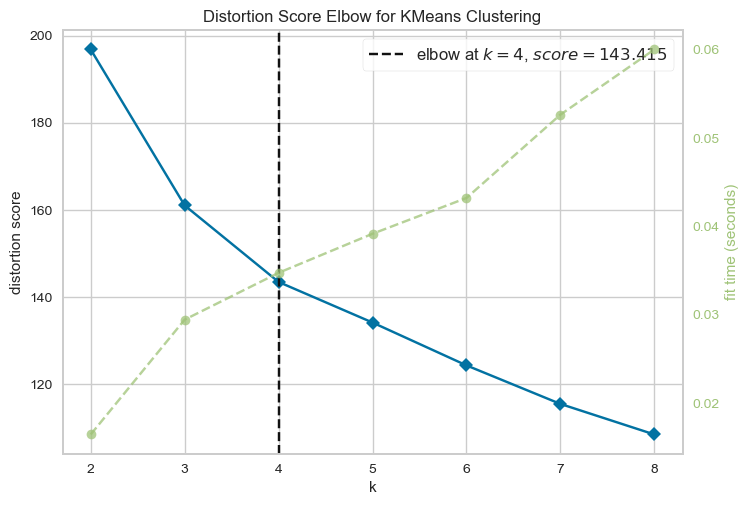

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
kmeans = KMeans()
kmeans.fit(normalized_df)

visualizer = KElbowVisualizer(kmeans, k=(2,9),locate_elbow=True)
visualizer.fit(normalized_df)
visualizer.show()

For n_clusters=2, The Silhouette Coefficient is 0.5474874088327079
For n_clusters=3, The Silhouette Coefficient is 0.4674974098277201
For n_clusters=4, The Silhouette Coefficient is 0.47237306611116264
For n_clusters=5, The Silhouette Coefficient is 0.4681948180096312
For n_clusters=6, The Silhouette Coefficient is 0.44779450720368724
For n_clusters=7, The Silhouette Coefficient is 0.2592330866420805
For n_clusters=8, The Silhouette Coefficient is 0.26705292137749087


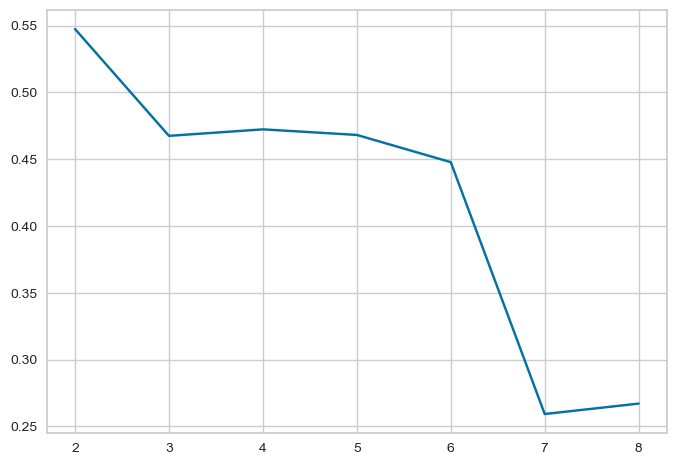

In [43]:
sse_ = []

for k in range (2,9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(normalized_df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k,
sil_coeff))
    sse_.append([k, silhouette_score(normalized_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

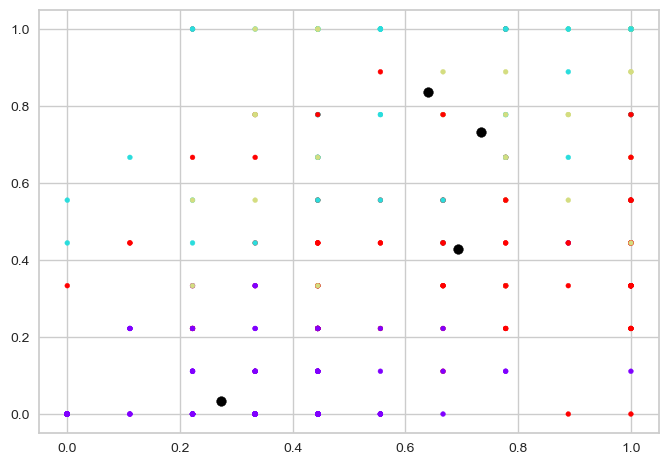

In [44]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(normalized_df)
labels = kmeans.predict(normalized_df)

plt.scatter(normalized_df['Clump Thickness'], normalized_df['Uniformity of Cell Size'], c=labels,s=12, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

In [45]:
from sklearn.metrics import adjusted_mutual_info_score
ami_score = adjusted_mutual_info_score(normalized_target.values.ravel(), kmeans.labels_)
print(ami_score)

0.5564145597010726


The AMI score is a measure of the agreement between the predicted and true labels in a clustering algorithm. The score ranges from 0 to 1, with a higher score indicating a better match between the predicted and true labels.

A good AMI score depends on the specific problem you are trying to solve, as well as the quality of your data. In general, a score of 0.6 or higher is considered good, while a score of 0.8 or higher is considered excellent.

To interpret the AMI score for your specific problem, you should compare it to the scores obtained by other clustering algorithms on the same dataset. This will allow you to determine whether the k-means algorithm is performing well relative to other algorithms on your dataset.


 <font size="6">Step 6 – Unsupervised learning (Hierarchal Clustering)</font>

In [46]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4)
hierarchical_clustering.fit(normalized_df)


AgglomerativeClustering(n_clusters=4)

In [47]:
from sklearn.cluster import FeatureAgglomeration
divisive_clustering = FeatureAgglomeration(n_clusters=4)
divisive_clustering.fit(normalized_df)

FeatureAgglomeration(n_clusters=4)

In [48]:
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import fcluster

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='single')
labels = model.fit_predict(normalized_df)
Z = linkage(normalized_df, 'single')
clusters = fcluster(Z, 20, criterion='maxclust')
inconsistency_single = inconsistent(Z)
inconsistency_single
average_inconsistency_single = np.mean(inconsistency_single)
print(average_inconsistency_single)

0.6111595503938866


In [49]:
from scipy.cluster.hierarchy import inconsistent

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='complete')
labels = model.fit_predict(normalized_df)
Z = linkage(normalized_df, 'complete')
inconsistency_complete = inconsistent(Z)
inconsistency_complete
average_inconsistency_complete = np.mean(inconsistency_complete)
print(average_inconsistency_complete)

0.6995510628190195


In [50]:
from scipy.cluster.hierarchy import inconsistent

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='average')
labels = model.fit_predict(normalized_df)
Z = linkage(normalized_df, 'average')
inconsistency_average = inconsistent(Z)
average_inconsistency_average = np.mean(inconsistency_average)
print(average_inconsistency_average)

0.6837948947492737


In [51]:
from scipy.cluster.hierarchy import inconsistent

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
labels = model.fit_predict(normalized_df)
Z = linkage(normalized_df, 'ward')
inconsistency_ward = inconsistent(Z)
average_inconsistency_ward = np.mean(inconsistency_ward)
print(average_inconsistency_ward)


0.7380339809535481


In [52]:
if average_inconsistency_single < average_inconsistency_complete and average_inconsistency_single < average_inconsistency_average and average_inconsistency_single < average_inconsistency_ward:
    print("The single linkage model is generating the best clusters.")
elif average_inconsistency_complete < average_inconsistency_single and average_inconsistency_complete < average_inconsistency_average and average_inconsistency_complete < average_inconsistency_ward:
    print("The complete linkage model is generating the best clusters.")
elif average_inconsistency_average < average_inconsistency_single and average_inconsistency_average < average_inconsistency_complete and average_inconsistency_average < average_inconsistency_ward:
    print("The average linkage model is generating the best clusters.")
else:    
    print("The Ward linkage model is generating the best clusters.")

The single linkage model is generating the best clusters.


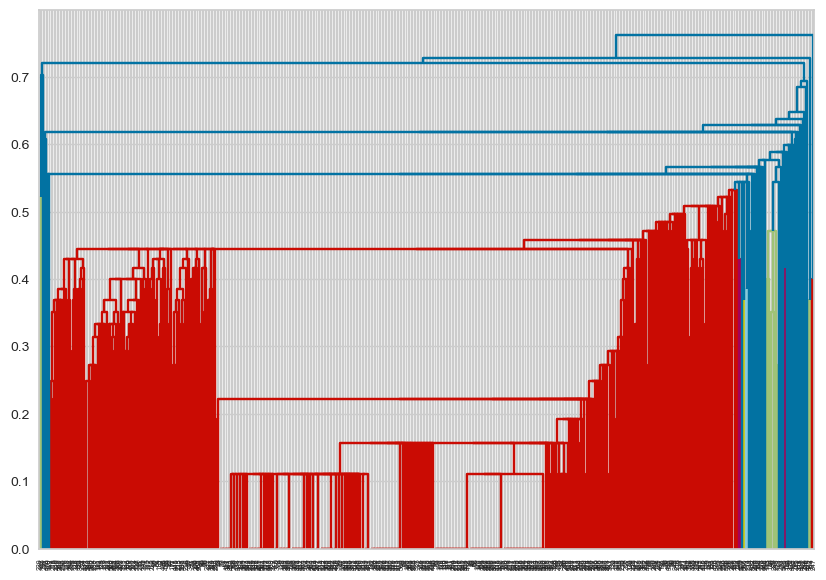

In [53]:
np.set_printoptions(precision=4,suppress=True)

linked = linkage(normalized_df, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending')
plt.show()  


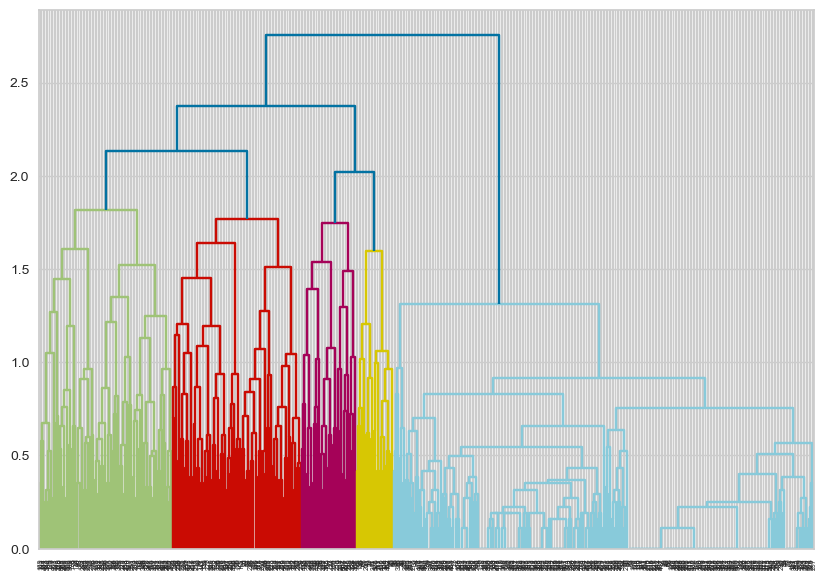

In [54]:
linked = linkage(normalized_df, 'complete')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

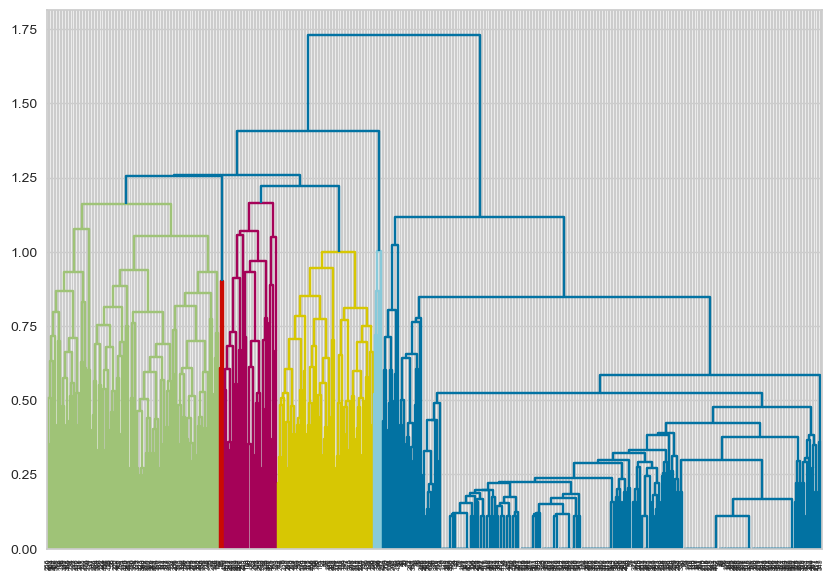

In [55]:
linked = linkage(normalized_df, 'average')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  


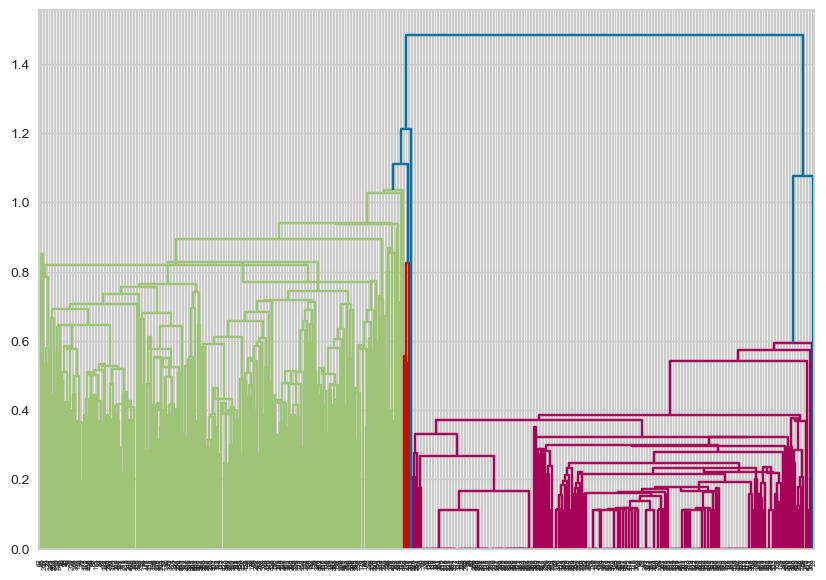

In [56]:
linked = linkage(normalized_df, 'centroid')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending')
plt.show()  

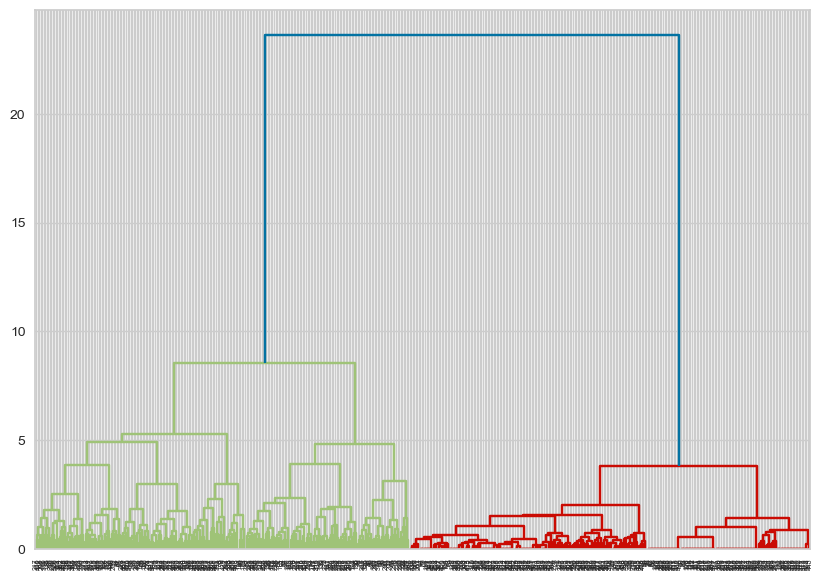

In [57]:
linked = linkage(normalized_df, 'ward')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending')
plt.show()  


 <font size="6">Step 7 – Naïve Bayes</font>

In [58]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_df, normalized_target, test_size=0.3, random_state=2)

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.ravel()
y_test = y_test.ravel()

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1:.2f}')

Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1 score: 0.99


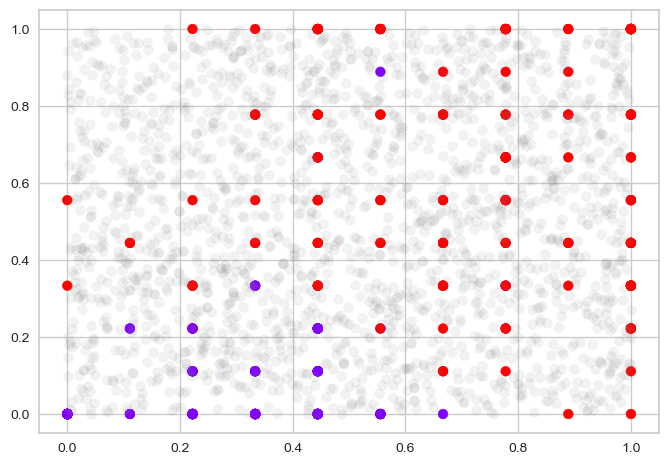

In [59]:
import matplotlib.pyplot as plt
X = X_train
y = y_train

rng = np.random.RandomState(0)
x_new = rng.rand(2000, 2)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='rainbow')
plt.scatter(x_new[:, 0], x_new[:, 1], c='grey', alpha=0.1)

lim = plt.axis()
plt.show()